In [ ]:
# data source: https://www.kaggle.com/c/titanic
# the aim of this project is to predict survival of Titanic passengers, using passenger characteristics

In [1]:
# clear all variables, functions, etc
%reset -f

In [2]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# load libraries
import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
import numpy as np #foundational package for scientific computing
import matplotlib as mpl #collection of functions for scientific and publication-ready visualization
from IPython import display #pretty printing of dataframes in Jupyter notebook
import seaborn as sns #data visualization

print('All libraries loaded successfully')

All libraries loaded successfully


In [4]:
# Configure Visualization Defaults
# %matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')

In [5]:
# Fixing random state for reproducibility
np.random.seed(123)

In [6]:
# import training set
train = pd.read_csv('../data/kaggle titanic/train.csv')

# import test set
test  = pd.read_csv('../data/kaggle titanic/test.csv')

# extract PassengerId from test set (to be used at the end of this script)
test_passengerid = test['PassengerId']

In [7]:
# bind rows of train and test set together
full = pd.concat([train,test])

In [8]:
# for each dataframe, view variable types (can use full.dtypes too)
print(train.info())
print(test.info())
print(full.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null 

In [9]:
# view summary statistics of a dataframe (count, mean, sd, min, max, quantiles)
print(full.describe())
print("-"*30)

# view number of rows and number of columns of dataframe
print(full.shape)
print("-"*30)

# view object type
print(type(full)) # tells you that 'full' is a dataframe
print(type(full['Sex'])) # tells you that 'Sex' is a series (aka column/vector/variable)
print(full['Sex'].dtype) # tells you that 'Sex' is of type object

               Age         Fare        Parch  PassengerId       Pclass  \
count  1046.000000  1308.000000  1309.000000  1309.000000  1309.000000   
mean     29.881138    33.295479     0.385027   655.000000     2.294882   
std      14.413493    51.758668     0.865560   378.020061     0.837836   
min       0.170000     0.000000     0.000000     1.000000     1.000000   
25%      21.000000     7.895800     0.000000   328.000000     2.000000   
50%      28.000000    14.454200     0.000000   655.000000     3.000000   
75%      39.000000    31.275000     0.000000   982.000000     3.000000   
max      80.000000   512.329200     9.000000  1309.000000     3.000000   

             SibSp    Survived  
count  1309.000000  891.000000  
mean      0.498854    0.383838  
std       1.041658    0.486592  
min       0.000000    0.000000  
25%       0.000000    0.000000  
50%       0.000000    0.000000  
75%       1.000000    1.000000  
max       8.000000    1.000000  
------------------------------
(1309

In [10]:
# view the no. of missing values for each variable in the dataframe 'full'
print(full.isnull().sum())
print('-'*30)

# view the percentage of missing values for each variable
print((full.isnull().sum() / full.shape[0] * 100).sort_values(ascending=False)) # full.shape[0] returns the no. of rows; full.shape[1] returns the no. of cols

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64
------------------------------
Cabin          77.463713
Survived       31.932773
Age            20.091673
Embarked        0.152788
Fare            0.076394
Ticket          0.000000
SibSp           0.000000
Sex             0.000000
Pclass          0.000000
PassengerId     0.000000
Parch           0.000000
Name            0.000000
dtype: float64


In [11]:
# delete useless variables from the dataset
full = full.drop(['Name','Ticket','PassengerId'], axis=1)

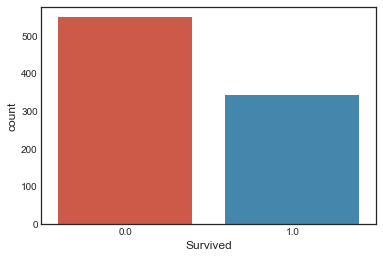

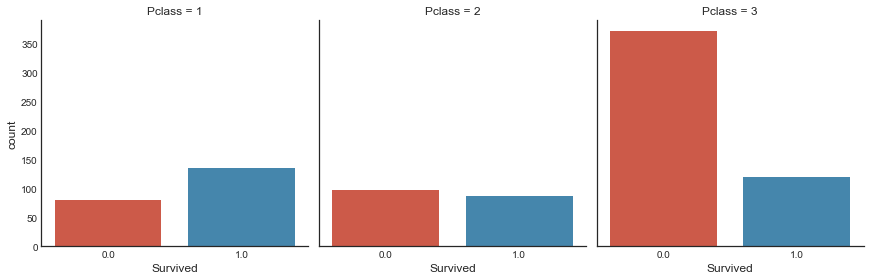

In [12]:
##### simple visualization: look at the distribution of the target variable 'Survived'
sns.countplot(x='Survived', data=full)

##### simple visualization: look at the distribution of the target variable 'Survived', conditional on 'Pclass'
sns.factorplot(x='Survived', col='Pclass', kind='count', data=full)

               Age         Fare        Parch       Pclass        SibSp  \
count  1046.000000  1308.000000  1309.000000  1309.000000  1309.000000   
mean     29.881138    33.295479     0.385027     2.294882     0.498854   
std      14.413493    51.758668     0.865560     0.837836     1.041658   
min       0.170000     0.000000     0.000000     1.000000     0.000000   
25%      21.000000     7.895800     0.000000     2.000000     0.000000   
50%      28.000000    14.454200     0.000000     3.000000     0.000000   
75%      39.000000    31.275000     0.000000     3.000000     1.000000   
max      80.000000   512.329200     9.000000     3.000000     8.000000   

         Survived  
count  891.000000  
mean     0.383838  
std      0.486592  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      1.000000  


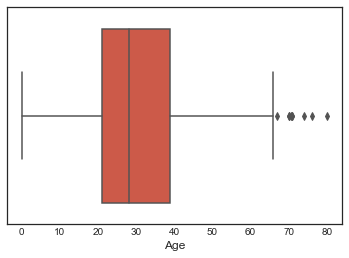

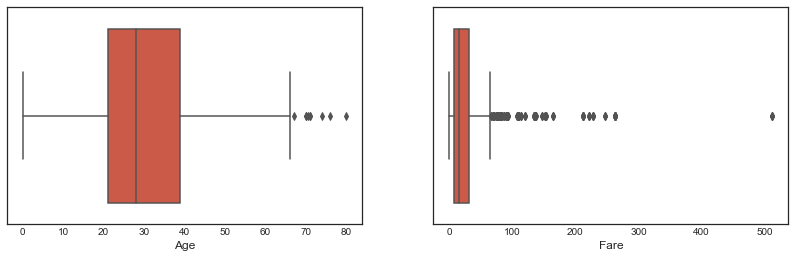

In [13]:
##### step 1: correct obvious data errors, if any

### check minimum and maximum of each variable; might be outliers
print(full.describe())

### visually check for outliers
# one boxplot
sns.boxplot(x = 'Age', data=full) # doesn't seem like there are any errors
# multiple boxplots
import matplotlib.pyplot as plt
fig, saxis = plt.subplots(1, 2,figsize=(14,4)) # to fit 1 rows and 2 columns worth of subplots in one plot
sns.boxplot(x = 'Age', data=full, ax = saxis[0])
sns.boxplot(x = 'Fare', data=full, ax = saxis[1])

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


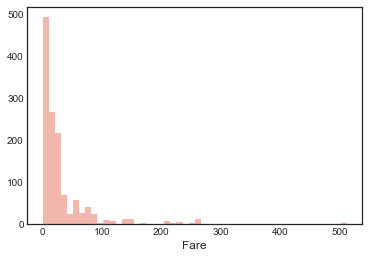

In [14]:
# can also view histogram / distribution plot to visually check for outliers
sns.distplot(full['Fare'].dropna(), kde=False)

In [15]:
##### step 2: impute missing values (simple)

# tabulate frequency counts of the variable Embarked
full['Embarked'].value_counts()

# impute missing values of Embarked with the mode of Embarked
full['Embarked'].fillna(full['Embarked'].mode()[0], inplace = True)

# impute missing values of Fare with the median of Fare
full['Fare'].fillna(full['Fare'].median(), inplace = True)

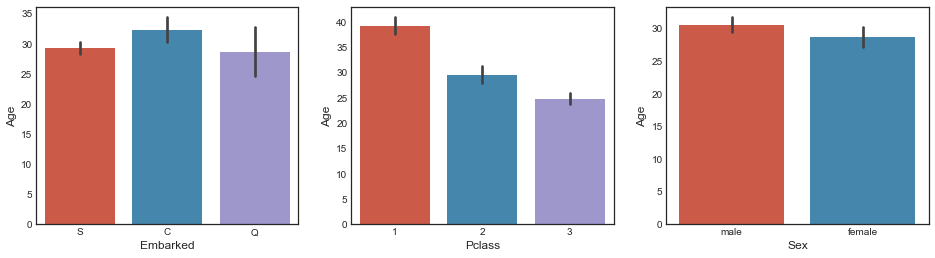

In [16]:
##### impute missing values (conditional)

import matplotlib.pyplot as plt

# graph individual features by Age
fig, saxis = plt.subplots(1, 3,figsize=(16,4)) # to fit 1 rows and 3 columns worth of subplots in one plot

sns.barplot(x = 'Embarked', y = 'Age', data=full, ax = saxis[0])
sns.barplot(x = 'Pclass', y = 'Age', data=full, ax = saxis[1])
sns.barplot(x = 'Sex', y = 'Age', data=full, ax = saxis[2])

# the middle graph suggests that average Age depends on Pclass; lets impute missing values of Age by the mean of Age conditional on Pclass
full['Age'] = full.groupby('Pclass').Age.transform(lambda x: x.fillna(x.mean()))

In [17]:
 # ensure no more missing values (other than cabin, which we will re-engineer later)
full.isnull().sum()

Age            0
Cabin       1014
Embarked       0
Fare           0
Parch          0
Pclass         0
Sex            0
SibSp          0
Survived     418
dtype: int64

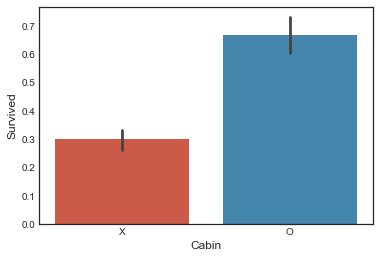

In [18]:
##### step 3: feature engineering (Cabin)

# tabulate frequency counts of the variable Cabin
full['Cabin'].value_counts()

# if Cabin is not missing, extract the first letter of Cabin; else impute 'X'
full["Cabin"] = pd.Series([i[0] if not pd.isnull(i) else 'X' for i in full['Cabin'] ])
full['Cabin'].value_counts()
# replace Cabin with 'O' if Cabin is not equal to 'X'
full.loc[(full['Cabin']!='X'),'Cabin'] = 'O'
full['Cabin'].value_counts()
# visualize whether having a cabin matters towards survival
sns.barplot(x='Cabin', y='Survived', data=full) # seems like it does matter

In [19]:
##### more feature engineering

# generate family size
full['FamilySize'] = full['Parch'] + full['SibSp'] + 1

# generate a dummy for whether the passenger has no family members on board
full['IsAlone'] = 0 # initialize the dummy to zero
full.loc[(full['FamilySize']==1),'IsAlone'] = 1 # set the dummy to 1 if the variable FamilySize equals to 1

# check that the new features were engineered correctly
print(full[['Parch','SibSp','FamilySize','IsAlone']].head(10))
print('-'*50)
print(full[['FamilySize','IsAlone']].info())

   Parch  SibSp  FamilySize  IsAlone
0      0      1           2        0
1      0      1           2        0
2      0      0           1        1
3      0      1           2        0
4      0      0           1        1
5      0      0           1        1
6      0      0           1        1
7      1      3           5        0
8      2      0           3        0
9      0      1           2        0
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 2 columns):
FamilySize    1309 non-null int64
IsAlone       1309 non-null int64
dtypes: int64(2)
memory usage: 70.7 KB
None


Text(0.5,1,'Sex vs Pclass Survival Comparison')

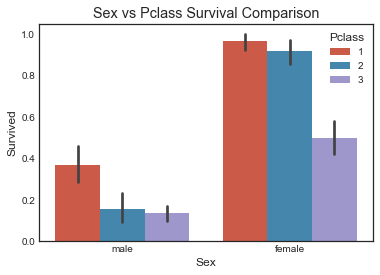

In [20]:
# useful visualization: visualize the relationship between 3 variables (bar graph)
sns.barplot(x = 'Sex', y = 'Survived', hue = 'Pclass', data=full).set_title('Sex vs Pclass Survival Comparison')

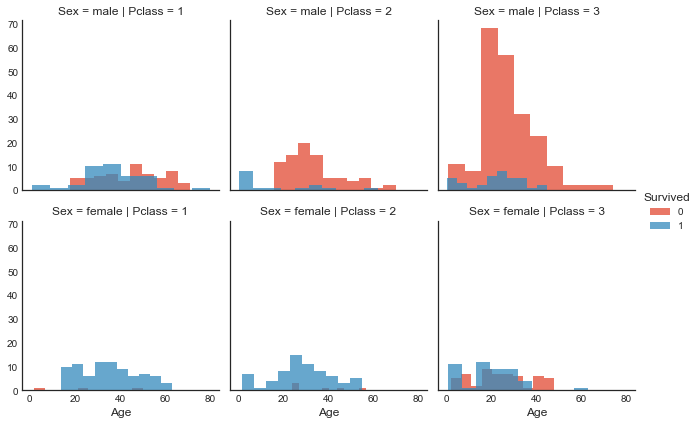

In [21]:
# useful visualization: plot histograms of Age by Sex, Pclass and Survived
h = sns.FacetGrid(train, row = 'Sex', col = 'Pclass', hue = 'Survived') # note that hue is optional
h.map(plt.hist, 'Age', alpha = 0.75) # alpha controls the opacity of the hue colors
h.add_legend()

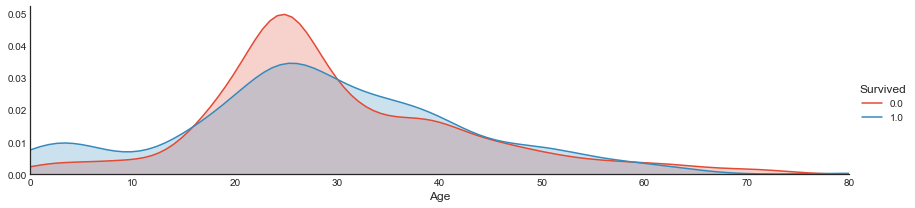

In [22]:
# useful visualization: plot distributions of age of passengers who survived or did not survive
a = sns.FacetGrid(full, hue = 'Survived', aspect=4 ) # use the dataset 'full', and plot one Age distribution per category of 'Survived'
a.map(sns.kdeplot, 'Age', shade= True ) # kernel density plot of Age
a.set(xlim=(0, train['Age'].max())) # set the boundaries of x-axis
a.add_legend() # add a legend for the distributions

In [23]:
##### step 4: one-hot encode all categorical variables

full['Pclass'] = full['Pclass'].astype('object') # cast Pclass to object type

categorical_variables = [] # initialize empty list

for col, col_data in full.iteritems():
    if col_data.dtype==object:
        categorical_variables.append(col) # populate list with the names of all object variables

full_dummies = pd.get_dummies(full[categorical_variables])

full = pd.concat([full, full_dummies], axis=1) # bind columns from two dataframes together

full = full.drop(categorical_variables, axis=1)




##### target encoding
#import category_encoders as ce

# target encode the categorical variables Pclass and Sex, using the conditional mean of Survived
#targetencode = ce.TargetEncoder(cols = categorical_variables)
#targetencode.fit(full,full['Survived'])
#full = targetencode.transform(full) # replaces the categorical values with the conditional means; no vars created or deleted

In [24]:
# ensure that there are no more object variables (recall that xgboost cannot take in object features)
full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 17 columns):
Age           1309 non-null float64
Fare          1309 non-null float64
Parch         1309 non-null int64
SibSp         1309 non-null int64
Survived      891 non-null float64
FamilySize    1309 non-null int64
IsAlone       1309 non-null int64
Cabin_O       1309 non-null uint8
Cabin_X       1309 non-null uint8
Embarked_C    1309 non-null uint8
Embarked_Q    1309 non-null uint8
Embarked_S    1309 non-null uint8
Pclass_1      1309 non-null uint8
Pclass_2      1309 non-null uint8
Pclass_3      1309 non-null uint8
Sex_female    1309 non-null uint8
Sex_male      1309 non-null uint8
dtypes: float64(3), int64(4), uint8(10)
memory usage: 134.6 KB


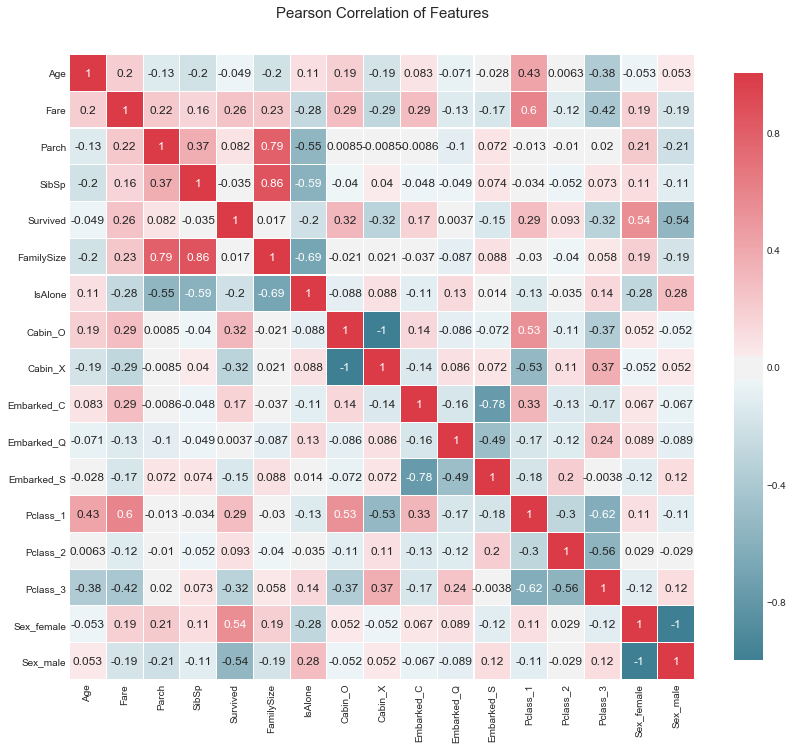

In [25]:
# useful visualization: correlation heatmap
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(full)

In [26]:
# split the cleaned full dataset into train and test datasets
train = full[:train.shape[0]]
test = full[train.shape[0]:]
del test['Survived']

In [27]:
##### step 5: model building

### view (stratified) 10-fold cross-validation performance of xgboost model
from sklearn import model_selection
from xgboost import XGBClassifier

target = train['Survived']
del train['Survived']

cv_results = model_selection.cross_validate(XGBClassifier(objective='binary:logistic'),
                                            train,
                                            target,
                                            scoring = 'accuracy',
                                            cv  = 10) # stratified 10-fold cross-validation

print("the mean training accuracy is:", cv_results['train_score'].mean())
print("the mean validation accuracy is:", cv_results['test_score'].mean())

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in fu

the mean training accuracy is: 0.8779142598228674
the mean validation accuracy is: 0.8227678470094201


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [28]:
##### use grid search to optimize the hyperparameters, while building the optimal model concurrently
param_grid = {'objective': ['binary:logistic'],
              'learning_rate': [0.3],
              'max_depth': [3],
              'n_estimators': [20,30]
             }

tune_model = model_selection.GridSearchCV(XGBClassifier(),
                                          param_grid=param_grid,
                                          scoring = 'accuracy',
                                          cv = 10)

tune_model.fit(train, target)

#print(tune_model.cv_results_['params'])
print('the optimized hyperparameters are: ', tune_model.best_params_)
#print(tune_model.cv_results_['mean_train_score'])
print("after optimization, the mean training accuracy is: {:.2f}". format(tune_model.cv_results_['mean_train_score'][tune_model.best_index_]*100)) 
#print(tune_model.cv_results_['mean_test_score'])
print("after optimization, the mean validation accuracy is: {:.2f}". format(tune_model.cv_results_['mean_test_score'][tune_model.best_index_]*100))

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in fu

the optimized hyperparameters are:  {'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 30, 'objective': 'binary:logistic'}
after optimization, the mean training accuracy is: 87.93
after optimization, the mean validation accuracy is: 82.15


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in fu

In [29]:
##### use random search to optimize the hyperparameters, while building the optimal model concurrently
from scipy.stats import randint
from scipy.stats import uniform

param_dist = {'objective': ['binary:logistic'],
              'learning_rate': uniform(0.1,0.05),
              'max_depth': randint(3,5),
              'n_estimators': randint(60,80)
             }

tune_model = model_selection.RandomizedSearchCV(XGBClassifier(),
                                                param_distributions=param_dist,
                                                scoring = 'accuracy',
                                                cv = 10,
                                                n_iter = 10) # number of iterations of random search

tune_model.fit(train, target)

#print(tune_model.cv_results_['params'])
print('the optimized hyperparameters are: ', tune_model.best_params_)
#print(tune_model.cv_results_['mean_train_score'])
print("after optimization, the mean training accuracy is: {:.2f}". format(tune_model.cv_results_['mean_train_score'][tune_model.best_index_]*100)) 
#print(tune_model.cv_results_['mean_test_score'])
print("after optimization, the mean validation accuracy is: {:.2f}". format(tune_model.cv_results_['mean_test_score'][tune_model.best_index_]*100))

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in fu

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in fu

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in fu

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in fu

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in fu

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in fu

the optimized hyperparameters are:  {'learning_rate': 0.1364524853692021, 'max_depth': 4, 'n_estimators': 74, 'objective': 'binary:logistic'}
after optimization, the mean training accuracy is: 89.92
after optimization, the mean validation accuracy is: 83.61


C:\Users\USER\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in fu

In [30]:
##### step 6: generate predictions using the built model
predictions_xgb = tune_model.predict(test)
predictions_xgb = predictions_xgb.astype('int')

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


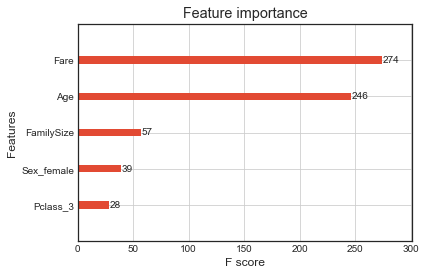

In [31]:
##### useful visualization: plot feature importance (as determined by the xgboost model you built)
fitted_xgb = XGBClassifier(**{'learning_rate':tune_model.best_params_['learning_rate'],
                              'max_depth':tune_model.best_params_['max_depth'],
                              'n_estimators':tune_model.best_params_['n_estimators']}).fit(train,target) # set parameters and build model

from xgboost import plot_importance
plot_importance(fitted_xgb,
                max_num_features = 5) # show the top 5 most important features

In [32]:
# prepare the submission file
submission_xgb = pd.DataFrame({'PassengerId': test_passengerid, 
                               'Survived': predictions_xgb})

# export the submission file to csv
submission_xgb.to_csv("../data/kaggle titanic/submission_xgb.csv", index=False)

the mean training accuracy is: 0.8927537271453915
the mean validation accuracy is: 0.8171493020088526


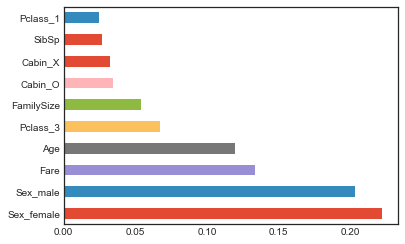

In [33]:
##### second model: random forest
from sklearn.ensemble import RandomForestClassifier

# initialize a template for random forest, based on the parameters you want to set
my_rfc = RandomForestClassifier(n_jobs = -1, # fully utilize the cores on your computer
                                n_estimators = 200, # number of trees
                                max_features = "sqrt", # number of features to consider at each split
                                max_depth = 7) # maximum tree depth

# 10-fold CV
cv_results = model_selection.cross_validate(my_rfc,
                                            train,
                                            target,
                                            scoring = 'accuracy',
                                            cv = 10)

print("the mean training accuracy is:", cv_results['train_score'].mean())
print("the mean validation accuracy is:", cv_results['test_score'].mean())

# fit the random forest
rf1 = my_rfc.fit(train,target)

# use the fitted model to make predictions
predictions_rf = rf1.predict(test)
predictions_rf = predictions_rf.astype('int')

submission_rf = pd.DataFrame({'PassengerId': test_passengerid, 
                              'Survived': predictions_rf})
submission_rf.to_csv("../data/kaggle titanic/submission_rf.csv", index=False)

# plot feature importance (as determined by the built random forest model)
feature_importances = pd.Series(rf1.feature_importances_, index=train.columns)
feature_importances = feature_importances.sort_values(ascending=False) # sort from highest to lowest importance; for pandas dataframe sorting, refer to https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
feature_importances.nlargest(10).plot(kind='barh')

In [34]:
##### third model: neural network
from sklearn.neural_network import MLPClassifier

# scale the features before feeding them into neural network
from sklearn.preprocessing import StandardScaler

scaled_train = StandardScaler().fit_transform(train)
scaled_train = pd.DataFrame(scaled_train, columns=train.columns)
train = scaled_train

scaled_test = StandardScaler().fit_transform(test)
scaled_test = pd.DataFrame(scaled_test, columns=test.columns)
test = scaled_test

# initialize a template for neural network, based on the parameters you want to set
nn1 = MLPClassifier(hidden_layer_sizes = (int(train.shape[1]/2)), # number of neurons in the hidden layer(s)
                    max_iter = 300) # max number of epochs

# 10-fold CV
cv_results = model_selection.cross_validate(nn1,
                                            train,
                                            target,
                                            scoring = 'accuracy',
                                            cv = 10)

print("the mean training accuracy is:", cv_results['train_score'].mean())
print("the mean validation accuracy is:", cv_results['test_score'].mean())

# fit the neural network
nn1.fit(train,target)

# use the fitted model to make predictions
predictions_nn = nn1.predict(test)
predictions_nn = predictions_nn.astype('int')

submission_nn = pd.DataFrame({'PassengerId': test_passengerid, 
                              'Survived': predictions_nn})
submission_nn.to_csv("../data/kaggle titanic/submission_nn.csv", index=False)

the mean training accuracy is: 0.8155668283159697
the mean validation accuracy is: 0.80365367154693


In [35]:
##### model stacking
from sklearn.ensemble import VotingClassifier

votingC = VotingClassifier(estimators=[('rf', my_rfc),
                                       ('xgb', tune_model.best_estimator_),
                                       ('nn', nn1)],
                           voting='soft')

votingC = votingC.fit(train, target)

predictions_stacked = votingC.predict(test)
predictions_stacked = predictions_stacked.astype('int')

submission_stacked = pd.DataFrame({'PassengerId': test_passengerid, 
                                   'Survived': predictions_stacked})
submission_stacked.to_csv("../data/kaggle titanic/submission_stacked.csv", index=False)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [36]:
import gc
gc.collect()

14774

In [37]:
print('this is the end of the notebook!')

this is the end of the notebook!
